In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()
len(df)

1759

In [26]:
# Q1: how to get 2 columns from the dataframe (city and country)?
# We can use a simple selection to achieve this. For example:
df[["city", "country"]]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


In [28]:
# Q2: how to get the first 5 rows of the "city" column?
# This works with a simple slice as well, but easier with loc or iloc. For example:
df.iloc[:5, 3]

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

In [29]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat                 51.4782
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [30]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[0, "country"]

'United Kingdom'

In [31]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[:4, ["city", "date"]]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24
4,Hounslow,05/14/2014 11:38


In [33]:
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[2,1]

-0.44608100000000006

In [36]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


In [37]:
# Part 2 How to select rows
#load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [39]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['city'] == 'Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [51]:
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.
# Cities visited in Spain outside of Barcelona were El Prat de Llobregat, Hospitalet de Llobregat and Viladecans.
spain = df[np.logical_and(df['country'] == 'Spain', df['city'] != 'Barcelona')]
spain.city.unique()

array(['El Prat de Llobregat', 'Viladecans', 'Hospitalet de Llobregat'],
      dtype=object)

In [48]:
# Q11: select rows where either the city is munich, or the country is serbia
df[np.logical_or(df['city'] == 'Munich', df['country'] == 'Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [55]:
# Q12: how many observations are west of the prime meridian?
# i.e. cities with a negative longitude 
west = df['lon'] < 0
len(west)


178

In [72]:
len(west.unique())

2

In [60]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.startswith('G')] 

,lat,lon,date,city,country
659,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
660,50.273632,18.729429,06/02/2014 06:55,Gliwice,Poland
942,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
943,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
1575,40.187827,20.079304,07/04/2014 17:39,Gjirokastër,Albania
1576,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [69]:
# Q14: how many unique cities and countries in the dataset? 15 countries and 113 cities
len(df.city.unique())

113

In [70]:
len(df.country.unique())

15

In [75]:
# Also can you check missing values for the dataframe
# There is no missingness
df.isnull().sum()

lat        0
lon        0
date       0
city       0
country    0
dtype: int64

In [77]:
# Q15: group by country name and show the city names in each of the country
df.groupby('country')['city'].unique()

country
Albania                                                [Berat, Gjirokastër]
Bosnia and Herzegovina       [Sarajevo, Mostar, Herzegovina-Neretva Canton]
Croatia                                           [Ploče, Split, Dubrovnik]
Czech Republic            [Novy Bohumin, Ostrava, Suchdol nad Odrou, Hra...
Germany                   [Kümmersbruck, Winkelhaid, Kammerstein, Ansbac...
Greece                    [Kakavia, Dytiki Ellada, Peloponnese, Athens, ...
Kosovo                                                            [Prizren]
Macedonia (FYROM)                                                   [Ohrid]
Montenegro                                                          [Kotor]
Poland                    [Zendek, Tarnowskie Góry County, Silesian Voiv...
Portugal                  [Lisbon, Amadora, Algueirão-Mem Martins, Sintr...
Serbia                                                [Belgrade, Slepčević]
Spain                     [El Prat de Llobregat, Viladecans, Barcelona, ...
Turk

In [101]:
#Part 3 select by date time stamps
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [102]:
len(dt)

1759

In [103]:
# Q16: is the timestamp index unique? How can you use code to find it?
# There is 1758 unique timestamps, meaning they are unique. We can find the date using 'index'
len(dt.index.unique())

1758

In [104]:
# Q17: drop duplicate index
dt.drop_duplicates(inplace=True)

In [105]:
len(dt)

1750

In [107]:
# the .weekday attribute determines which day of the week a date is
# 0 is sunday and 6 is saturday, M-F are 1-5
# Q18: create a weekday and a weekend dataframe

dt['weekday'] = dt.index.weekday

In [111]:
weekday = dt[np.logical_and(dt['weekday'] > 0, dt['weekday'] < 6)]

In [113]:
weekend = dt[np.logical_or(dt['weekday'] == 0, dt['weekday'] == 6)]

In [136]:
# Q19: calculate and plot the number of observations each day of the week has

dt.groupby('weekday', as_index = False)['Observations'].count()
daily = dt.groupby(dt.index.weekday).size()
daily.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

<AxesSubplot:title={'center':'Number of Observations grouped by Weekday'}>

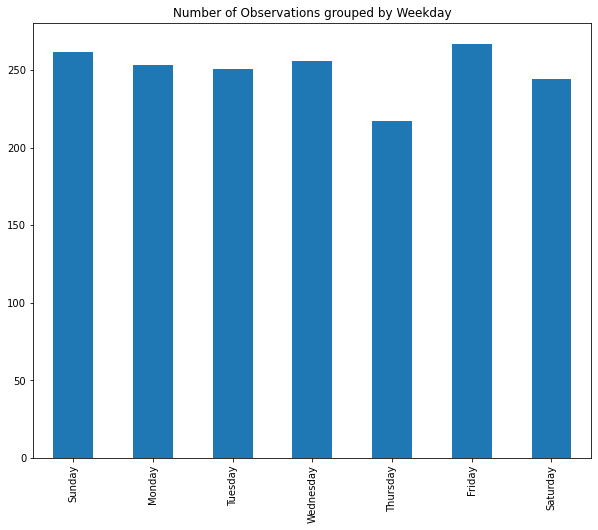

In [139]:
daily.plot(figsize=(10, 8), kind = 'bar', title = 'Number of Observations grouped by Weekday')